<a href="https://colab.research.google.com/github/technisekai/orbit-future-academy-km/blob/main/NLP_1_2_Widi_Afandi_Visioner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Widi Afandi**

**Kelas: Visioner**

# Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:
- Tentukan langkah text pre-processing yang tepat untuk dataset di atas.
- Gunakan range `n_gram` yang berbeda. Amati apa perbedaannya.
- Menurut Anda, apakah `term` yang dihasilkan (`X_kbest_features`) pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan text pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa

Batas pengumpulan maksimal: Jumat, 1 April 2022

# 1. Import library

*install dan import library yang dibutuhkan*

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 22.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
#Classification Algorithms 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# kode warna
spring_pastels = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# 2. Data Acquisition

*impor dataset yang digunakan*

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/20191002-reviews.csv')

In [ ]:
# menampilkan 5 data index teratas
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


*cek apakah dataset mempunyai nilai NaN*

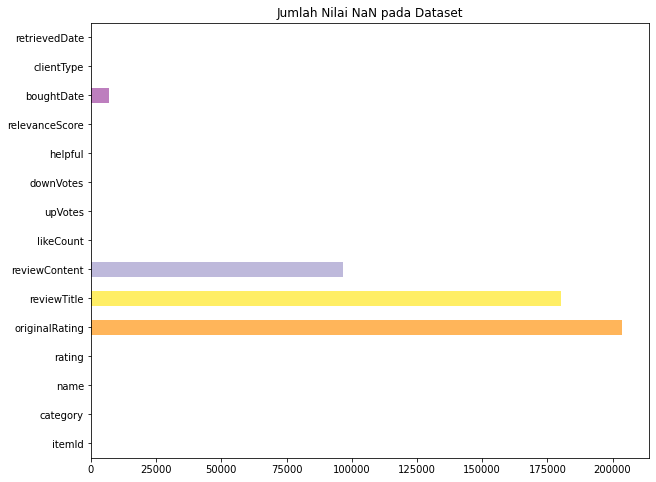

In [ ]:
# atur ukuran graph
plt.rcParams["figure.figsize"] = (10,8)
# melihat jumlah nilai NaN pada masing-masing kolom
df.isna().sum().plot(kind='barh', title='Jumlah Nilai NaN pada Dataset', color=spring_pastels)
plt.show()

# 3. Data Cleansing

In [ ]:
# memilih kolom rating dan reviewContent
df_new = df[['rating', 'reviewContent']]
df_new.head()

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN


In [ ]:
# drop nilai nan
df_new.dropna(inplace=True)
df_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
7,1,bima


# 4. Data Preprocessing

## 4.1 Casefolding

In [ ]:
# case folding
def casefolding(text):
  text = text.lower()                                 # Ubah jadi lowercase
  text = re.sub(r'https?://\S+|www\.\S+', '', text)   # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)             # Menghapus karakter angka
  text = re.sub(r'[^\w\s]', '', text)                 # Menghapus karakter tanda baca
  text = text.strip()
  return text

## 4.2 Normalisasi

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

#import data
key_norm = pd.read_csv('key_norm.csv')
# word normalization
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

--2022-03-28 16:25:12--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-03-28 16:25:12 (5.97 MB/s) - ‘key_norm.csv’ saved [80969/80969]



## 4.3 Stopword Removal

In [ ]:
stopwords_id = stopwords.words('indonesian')

# Buat stopwords removal
def remove_stopwords(text):
  clean_word = []
  all_text = text.split()
  for word in all_text:
    if word not in stopwords_id:
      clean_word.append(word)
  return ' '.join(clean_word)

## 4.4 Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming
def stemming(text):
  text = stemmer.stem(text)
  return text

## 4.5 Memanggil semua fungsi

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah pada text preprocessing
def data_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [ ]:
df_new['cleanReview'] = df_new['reviewContent'].apply(data_preprocessing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.head()

,rating,reviewContent,cleanReview
0,5,bagus mantap dah sesui pesanan,bagus mantap sesui pesan
1,4,"Bagus, sesuai foto",bagus sesuai foto
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,4,bagus sesuai,bagus sesuai
7,1,bima,bima


# 5. Feature Engineering

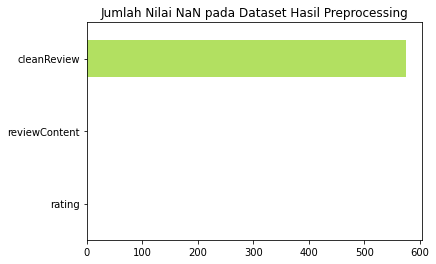

In [ ]:
# atur ukuran graph
plt.rcParams["figure.figsize"] = (6,4)
# melihat jumlah nilai NaN pada masing-masing kolom di dataset hasil preprocessing
df_new.isna().sum().plot(kind='barh', title='Jumlah Nilai NaN pada Dataset Hasil Preprocessing', color=spring_pastels)
plt.show()

In [ ]:
# menghilangkan nilai NaN pada kolom cleanReview
df_new.dropna(inplace=True)
# tampilkan hasil
df_new.head()

,rating,reviewContent,cleanReview
0,5,bagus mantap dah sesui pesanan,bagus mantap sesui pesan
1,4,"Bagus, sesuai foto",bagus sesuai foto
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,4,bagus sesuai,bagus sesuai
4,1,bima,bima


In [ ]:
# pilih 5000 data secara random (tf-idf dan bow kurang efektif ketika menangani data besar)
df_new = df_new.sample(5000, replace=True)
# tampilkan dataset
df_new.head()

,rating,reviewContent,cleanReview
85503,5,Ok mantap,ok mantap
88949,5,Dapat berfungsi baik,fungsi
104177,5,original,original
86072,5,OK,ok
32775,5,sesuai dengan gambar,sesuai gambar


In [ ]:
# memisahkan atribut dan label
X = df_new['cleanReview'].values
y = df_new['rating']

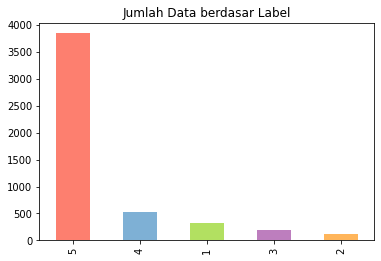

In [ ]:
df_new['rating'].value_counts().plot(kind='bar', title='Jumlah Data berdasar Label', color=spring_pastels)

## 5.1 TF-IDF

In [ ]:
# dict untuk menyimpan hasil tf_idf
res_tfidf = {
    'n_gram': [],
    'sum_token': [],
    'X_tf_idf': [],
    'tf_idf': []
    }
# menentukan nilai n
n = 7
# proses tf idf
for i in range(1, n+1):
  tf_idf = TfidfVectorizer(ngram_range=(i, i))
  tf_idf.fit(X)
  X_tf_idf = tf_idf.transform(X).toarray()
  # menambahkan hasil ke dict
  res_tfidf['n_gram'].append(i)
  res_tfidf['sum_token'].append(len(tf_idf.get_feature_names_out()))
  res_tfidf['X_tf_idf'].append(X_tf_idf)
  res_tfidf['tf_idf'].append(tf_idf)

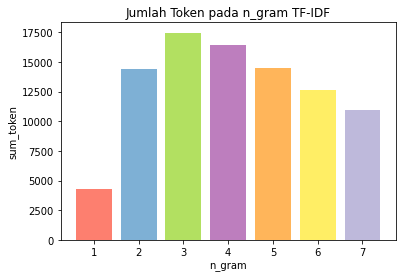

In [ ]:
# plot hasil dari n_gram dan jumlah token yang dihasilkan
plt.bar(res_tfidf['n_gram'], res_tfidf['sum_token'], color=spring_pastels)
plt.xlabel('n_gram')
plt.ylabel('sum_token')
plt.title('Jumlah Token pada n_gram TF-IDF')
plt.show()

## 5.2 Bag of Words

In [ ]:
# dict untuk menyimpan hasil bow
res_bow = {
    'n_gram': [],
    'sum_token': [],
    'X_bow': [],
    'bow': []
    }
# menentukan nilai NaN
n = 7
# proses bow
for i in range(1, n):
  bow = CountVectorizer(ngram_range=(i,i))
  bow.fit(X)
  X_bow = bow.transform(X).toarray()
  # menambahkan hasil ke dict
  res_bow['n_gram'].append(i)
  res_bow['sum_token'].append(len(bow.get_feature_names_out()))
  res_bow['X_bow'].append(X_bow)
  res_bow['bow'].append(bow)

In [ ]:
res_bow['sum_token']

[5542, 20293, 25543, 24278, 21383, 18566]

In [ ]:
res_tfidf['sum_token']

[5542, 20293, 25543, 24278, 21383, 18566, 16120]

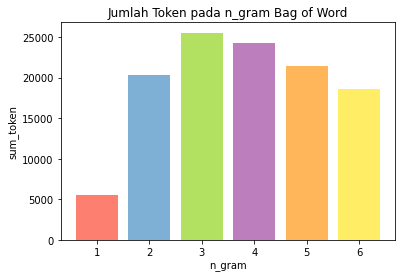

In [ ]:
# plot hasil dari n_gram dan jumlah token yang dihasilkan
plt.bar(res_bow['n_gram'], res_bow['sum_token'], color=spring_pastels)
plt.xlabel('n_gram')
plt.ylabel('sum_token')
plt.title('Jumlah Token pada n_gram Bag of Word')
plt.show()

## 5.3 Feature selection

In [ ]:
# menggunakan hasil tf idf dengan n gram 1 untuk atribut
X_tfidf = np.array(res_tfidf['X_tf_idf'][0])
# label y
y = np.array(y)

In [ ]:
# seleksi fitur tfidf dengan chi memilih 1000
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X_tfidf, y) 

In [ ]:
# mengambil nilai chi score.Semakin tinggi semakin baik
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.128241
1,1.083615
2,2.944305
3,1.860993
4,0.393115
...,...
4250,0.315206
4251,10.552555
4252,0.132081
4253,9.916874


In [ ]:
# Menampilkan fitur beserta nilainya
feature = res_tfidf['tf_idf'][0].get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.128241,aalaupun
1,1.083615,aamiin
2,2.944305,aapalagi
3,1.860993,abal
4,0.393115,abalabal
...,...,...
4250,0.315206,zn
4251,10.552555,zong
4252,0.132081,zonk
4253,9.916874,zoonkpdhal


In [ ]:
data_chi2.shape

(5542, 2)

In [ ]:
# Mengurutkan fitur secara descending
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
5525,90.059429,yh
2351,88.394787,kecewa
4325,85.392987,rusak
5061,72.067052,terplay
695,68.882050,bit
...,...,...
212,0.033699,are
4283,0.033699,revised
4269,0.033699,responsible
4249,0.033699,reply


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False,  True, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['adaptor',
 'agustus',
 'air',
 'ajabsa',
 'ajib',
 'aju',
 'aktifin',
 'akun',
 'alamat',
 'alami',
 'alhamdulillah',
 'alias',
 'alih',
 'aman',
 'amancuma',
 'ambil',
 'amin',
 'and',
 'androidnya',
 'angin',
 'anjrit',
 'anter',
 'antivirus',
 'apa',
 'apain',
 'apamksih',
 'appa',
 'aqous',
 'ark',
 'asalasalan',
 'asisten',
 'aspek',
 'ata',
 'ati',
 'ato',
 'awet',
 'baca',
 'baeang',
 'bagus',
 'bagushanya',
 'baguskalo',
 'bagusoriginal',
 'baguspaketan',
 'bagussayang',
 'bagussip',
 'baik',
 'baikaman',
 'baiktetapi',
 'baikwalau',
 'bakar',
 'balikin',
 'bandung',
 'bang',
 'banhets',
 'banting',
 'bar',
 'baramg',
 'barang',
 'barangnyq',
 'baret',
 'barng',
 'barsng',
 'barudi',
 'barusayangnya',
 'basa',
 'basah',
 'batal',
 'batalin',
 'batas',
 'batrai',
 'batreinya',
 'batreremote',
 'baud',
 'baut',
 'bawa',
 'bawahmau',
 'bayang',
 'bayar',
 'be',
 'bedadua',
 'bekas',
 'belakang',
 'beli',
 'bener',
 'bengkel',
 'bergarisini',
 'berisik',
 'berkah',
 'bget',
 'bgi

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning
# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,acc,acer,adagimana,adasaya,adfattor,air,ajklo,akses,aktifin,aktifitasnya,...,yahh,yahhh,yahini,yalord,yasudah,yaw,yh,yulia,zenfone,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.261341,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


*menyimpan tf-idf ke pickle*

In [ ]:
import pickle

# Simpan objek dari hasil TF-IDF
with open('hasil_tf_idf.pickle', 'wb') as ouput:
  pickle.dump(res_tfidf['X_tf_idf'][0], ouput)

*menyimpan bow*

In [ ]:
with open('hasil_bow.pickle', 'wb') as ouput:
  pickle.dump(res_bow['X_bow'][0], ouput)

## 5.4 Train Test Split

*split data menjadi train dan test*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2)

# 6. Modeling

*definisi model yang digunakan*

In [ ]:
from xgboost import XGBClassifier
classifiers = {
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),
               'K Nearest Neighbour':KNeighborsClassifier(8),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Gaussian Naive Bayes Classifier':GaussianNB(),
               'Support Vector Classifier':SVC(),
               }
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score"]
log = pd.DataFrame(columns=log_cols)

*proses training dengan algoritma yang sudah didefinisikan dan menyimpan hasilnya pada dataframe*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for Name,classify in classifiers.items():
  cls = classify
  cls = cls.fit(X_train,y_train)
  y_out = cls.predict(X_test)
  accuracy = m.accuracy_score(y_test,y_out)
  precision = m.precision_score(y_test,y_out,average='macro')
  recall = m.recall_score(y_test,y_out,average='macro')
  f1_score = m.f1_score(y_test,y_out,average='macro')
  log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score]], columns=log_cols)
  log = log.append(log_entry)

# 7. Evaluasi

*evaluasi menggunakan classification report dan visualisasi*

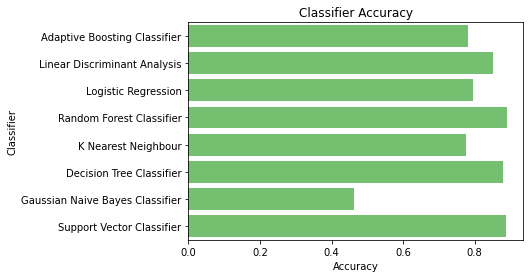

In [ ]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

*hasil akurasi tertinggi dari algortima yang digunakan*

In [ ]:
history = pd.DataFrame(log)
history.loc[history.Accuracy == max(history.Accuracy)]

,Classifier,Accuracy,Precision Score,Recall Score,F1-Score
0,Random Forest Classifier,0.891,0.931241,0.645247,0.747971


# 7. Kesimpulan



*   Pada dataset yang digunakan terdapat cukup banyak nilai NaN pada beberapa kolom, pendekatan yang dilakukan adalah menghapus row yang memiliki nilai NaN pada kolom reviewContent.Langkah selanjutnya adalah casefolding, menghapus url, menghapus angka, menghapus karakter, normalisasi, stopword removal, serta stemming untuk membersihkan data.Selanjutnya dilakukan feature engineering menggunakan TF-IDF atau Bag of Words.Kali ini dipilih TF-IDF untuk dilanjutkan seleksi feature menggunakan chi square.
*   Dicoba n_gram dari 1 sampai 7, terdapat perbedaan jumlah token yang dihasilkan dimana token terbanyak dihasilkan di n ke 3.Untuk n_gram 1-3 jumlah token yang dihasilkan semakin tinggi sedangkan 4-n jumlah yang dihasilkan semakin rendah.
*   menurut saya, term yang dihasilkan X_kbest_feature sudah memiliki informasi yang relevan.Dapat dilihat kata yang dihasilkan merupakan kata sifat seperti rusak, awet dan lain-lain sesuai dengan review pada umumnya yang biasanya menyatakan sifat barang yang dibeli
*   Data yang digunakan untuk klasifikasi adalah 5000 data yang diambil secara random.Melalui visualisasi diketahui bahwa baik data asli ataupun yang diambil secara random tidak seimbang labelnya sehingga memungkinkan kinerja model menjadi kurang.
*   Dilakukan klasifikasi dengan menggunakan model dari sklearn, hasilnya model yang digunakan rata-rata mendapat akurasi sekitar 70%.Akurasi tertinggi didapat oleh algoritma `random forest` dengan akurasi 89%.
